In [191]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import numpy as np



In [192]:
data = pd.read_csv("C:\\Users\\skani\\Desktop\\github\\original.csv")
data.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [193]:
data.tail()
data.drop(['clientid'],axis=1)

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0


In [194]:
data.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [195]:
#search for missing values 
data['age'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: age, Length: 2000, dtype: bool

In [196]:
data.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [197]:
#count the number of negative values in the column age to decide if we remove them
n=0
for col in data['age'] :
    if col<0 : 
        n=n+1
print(n)
    

3


In [198]:
#remove negative values and null
data.shape

data = data.loc[data['age']>=0]
data.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [199]:
data.describe()


,clientid,income,age,loan,default
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,1003.431795,45328.856915,40.927700,4443.240892,0.141926
std,575.879624,14326.777212,13.271802,3046.879619,0.349062
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,505.250000,32812.340050,29.043284,1934.218490,0.000000
50%,1003.500000,45785.950926,41.382673,3971.653442,0.000000
75%,1501.750000,57782.054534,52.616900,6438.044498,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


(array([  0.,   0.,   0.,  91., 213., 237., 207., 196., 217., 218., 241.,
        209., 165.,   0.,   0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 15 Patch objects>)

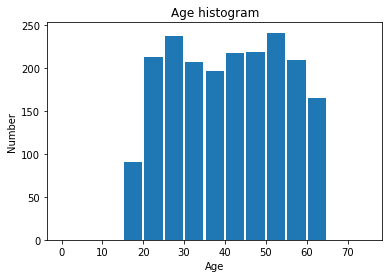

In [200]:
bins=range(0,80,5)
plt.title("Age histogram")
plt.xlabel("Age")
plt.ylabel("Number")
plt.hist(data['age'],bins,rwidth=0.9)

#the majority of people who take credit are aged between 20 and 60 years olds


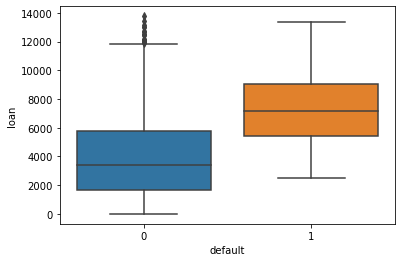

In [201]:
#boxplot of the ioncome and loan amount 

sns.boxplot(x="default", y="loan", data=data)
#comment : the people who default loan seem to take bigger credits 

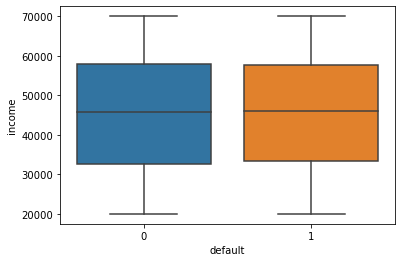

In [202]:
sns.boxplot(x="default", y="income", data=data)
#no visual trend is seen 

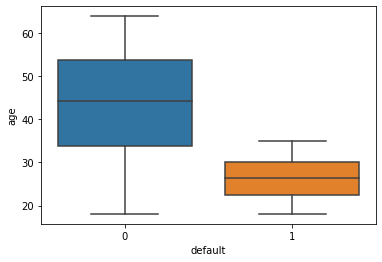

In [203]:
sns.boxplot(x="default", y="age", data=data)
#comment : the youth seam to struggle to pay their debt 

,clientid,income,age,loan,default
clientid,1.000000,0.039835,-0.030576,0.019661,-0.022308
income,0.039835,1.000000,-0.033256,0.441074,0.002366
age,-0.030576,-0.033256,1.000000,0.006686,-0.445248
loan,0.019661,0.441074,0.006686,1.000000,0.377789
default,-0.022308,0.002366,-0.445248,0.377789,1.000000


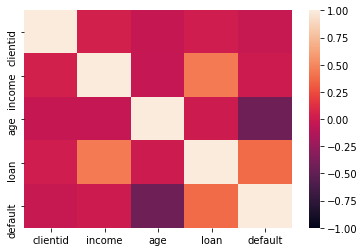

In [204]:
sns.heatmap(data.corr(),vmin=-1,vmax=1)

data.corr()

#we dont have correlatiopn between the feautures exepct for default and age and default and loan 
#another good term that we dont have dependecy between the feautres thats why a logistic regression  

In [205]:
# Split into X (Independent) and Y (predicted)
data.drop(['clientid'],axis=1)
x = data.iloc[:, :-1]
y = data.iloc[:,  -1]

In [224]:

# Create the Training and Test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 1234 , stratify = y)



In [225]:
# Build the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver ='lbfgs')

lr.fit(x_train, y_train)


LogisticRegression()

In [226]:
y_predict = lr.predict(x_test)

In [237]:
# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

score = lr.score(x_test, y_test)

print(score)

print ('confusion matrix  =  \n' , cm)

0.9097744360902256
confusion matrix  =  
 [[342   0]
 [ 57   0]]


In [238]:
#understanding the score 
prediciton  = (lr.predict(x_test) > .2).astype(int)
np.sum(prediciton == y_test)/len(y_test)


#we got the same the number !  thats great 

0.9097744360902256

In [229]:
lr_coefficient = lr.coef_
lr_intercept = lr.intercept_

print (lr_coefficient )
print (lr_intercept )

[[ 6.50162696e-04 -6.94538089e-05 -1.48315848e-01  9.52626219e-04]]
[-0.00057987]


In [230]:
#calculate the error
from sklearn.metrics import mean_squared_error
import math

lr_rmse = math.sqrt(mean_squared_error(y_test, y_predict))
print (lr_rmse)

0.3003757045930553


In [231]:
# Import and build Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [234]:
# Predict the outcome using Test data
y_predict = svc.predict(x_test)

y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [241]:
# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print('confusion matrix = \n ',cm)
score = svc.score(x_test, y_test)

print ('R square avec SVC =  ' , score )

confusion matrix = 
  [[342   0]
 [ 57   0]]
R square avec SVC =   0.8571428571428571


In [243]:
# Import and train classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1234)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [246]:
#test the model 
y_predict = dtc.predict(x_test)

In [251]:
# Evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
score = dtc.score(x_test, y_test)

print ('confusion matrix = \n ', cm)
print ('dtc score : ' , score )


#analysing the decision tree's confusuing matrix we could see thats this model makes less faults than the Svector 

confusion matrix = 
  [[337   5]
 [  1  56]]
dtc score :  0.9849624060150376


In [255]:
# Import and train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1234)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=1234)

In [256]:
# Test the RFC model
y_predict = rfc.predict(x_test)

In [257]:
# Evaluate the RFC model
cm2 = confusion_matrix(Y_test, Y_predict)
score2 = rfc.score(X_test, Y_test)

print ('confusing matrix for random forest : \n ', cm2)
print (' R squared for random forest : ', score2)

confusing matrix for random forest : 
  [[297  40]
 [ 53   9]]
 R squared for random forest :  0.9949874686716792
